In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('C:/Users/Svitlana', one_hot=True)

W0809 12:48:12.349926 139921402709888 deprecation.py:323] From <ipython-input-1-9a82ca98995c>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0809 12:48:12.351824 139921402709888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0809 12:48:12.358803 139921402709888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting C:/Users/Svitlana/train-images-idx3-ubyte.gz


W0809 12:48:13.217048 139921402709888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0809 12:48:13.223712 139921402709888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting C:/Users/Svitlana/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting C:/Users/Svitlana/t10k-images-idx3-ubyte.gz


W0809 12:48:13.465932 139921402709888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting C:/Users/Svitlana/t10k-labels-idx1-ubyte.gz


In [0]:
import numpy as np
X_train = mnist.train.images
X_test = mnist.test.images
y_train = np.argmax(mnist.train.labels, axis=1)
y_test = np.argmax(mnist.test.labels, axis=1)

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55000, 784), (10000, 784), (55000,), (10000,))

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
np.random.seed(123)
tf.set_random_seed(123)

In [7]:
y_train_onehot = keras.utils.to_categorical(y_train)
 
print('First 3 labels: ', y_train[:3])
print('\nFirst 3 labels (one-hot):\n', y_train_onehot[:3])

First 3 labels:  [7 3 4]

First 3 labels (one-hot):
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units=50,    
        input_dim=X_train.shape[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=50,    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=y_train_onehot.shape[1],    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='softmax'))


sgd_optimizer = keras.optimizers.SGD(
        lr=0.001, decay=1e-7, momentum=.9)

model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy')

W0809 12:53:53.093231 139921402709888 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
history = model.fit(X_train, y_train_onehot,
                    batch_size=64, epochs=50,
                    verbose=1,
                    validation_split=0.1)

Train on 49500 samples, validate on 5500 samples
Epoch 1/50
49500/49500 [==============================] - 2s 42us/sample - loss: 1.0124 - val_loss: 0.5086
Epoch 2/50
49500/49500 [==============================] - 2s 31us/sample - loss: 0.4904 - val_loss: 0.3552
Epoch 3/50
49500/49500 [==============================] - 2s 31us/sample - loss: 0.3929 - val_loss: 0.2990
Epoch 4/50
49500/49500 [==============================] - 2s 31us/sample - loss: 0.3475 - val_loss: 0.2703
Epoch 5/50
49500/49500 [==============================] - 2s 31us/sample - loss: 0.3191 - val_loss: 0.2501
Epoch 6/50
49500/49500 [==============================] - 2s 31us/sample - loss: 0.2988 - val_loss: 0.2352
Epoch 7/50
49500/49500 [==============================] - 2s 31us/sample - loss: 0.2826 - val_loss: 0.2249
Epoch 8/50
49500/49500 [==============================] - 2s 31us/sample - loss: 0.2691 - val_loss: 0.2162
Epoch 9/50
49500/49500 [==============================] - 2s 31us/sample - loss: 0.2573 - val_l

In [11]:
y_train_pred = model.predict_classes(X_train, verbose=0)
print('First 3 predictions: ', y_train_pred[:3])

First 3 predictions:  [7 3 9]


In [13]:
y_train_pred = model.predict_classes(X_train, 
                                     verbose=0)
correct_preds = np.sum(y_train == y_train_pred, axis=0) 
train_acc = correct_preds / y_train.shape[0]

print('First 3 predictions: ', y_train_pred[:3])
print('Training accuracy: %.2f%%' % (train_acc * 100))

First 3 predictions:  [7 3 9]
Training accuracy: 97.55%


In [15]:
y_test_pred = model.predict_classes(X_test, 
                                    verbose=0)

correct_preds = np.sum(y_test == y_test_pred, axis=0) 
test_acc = correct_preds / y_test.shape[0]
print('Test accuracy: %.2f%%' % (test_acc * 100))

Test accuracy: 96.52%


In [16]:
X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [17]:
# W : array with shape = (n_output_units, n_hidden_units+1)
#     note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
#     note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])

Z = np.dot(W, A[0])
y_probas = logistic(Z)

print('Net Input: \n', Z)

print('Output Units:\n', y_probas)

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]


In [18]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: %d' % y_class)

Predicted class label: 0


In [19]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


In [20]:
np.sum(y_probas)

1.0

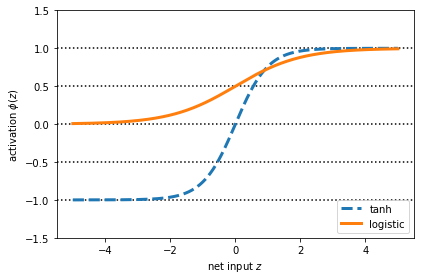

In [21]:
import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')

plt.plot(z, tanh_act,
         linewidth=3, linestyle='--',
         label='tanh')

plt.plot(z, log_act,
         linewidth=3,
         label='logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()